In [10]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) =boston_housing.load_data()

In [11]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [12]:
from keras import models
from keras import layers
def my_model():
    model=models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


In [19]:
# cross validation

import numpy as np
k=4
num_val_samples=len(train_data)//k
num_epochs=100
all_scores=[]
for i in range(k):
    print('processing fold #',i)
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data=np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
    model=my_model()
    model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=1,verbose=0)
    val_mse,va_mae=model.evaluate(val_data,val_targets,verbose=0)
    all_scores.append(va_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [20]:
all_scores, np.mean(all_scores)


([2.073421001434326, 2.666909694671631, 2.9667201042175293, 2.501638174057007],
 2.5521722435951233)

In [23]:
# for 500 epochs throw the history
k=4
num_val_samples=len(train_data)//k
num_epochs=500
all_mae_hist=[]
for i in range(k):
    print('processing fold #',i)
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data=np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
    model=my_model()

    histry=model.fit(partial_train_data,partial_train_targets,validation_data=(val_data,val_targets),
                     epochs=num_epochs,batch_size=1,verbose=0)
    mae_his=histry.history['val_mae']
    all_mae_hist.append(mae_his)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [24]:
average_mae_history = [
 np.mean([x[i] for x in all_mae_hist]) for i in range(num_epochs)]

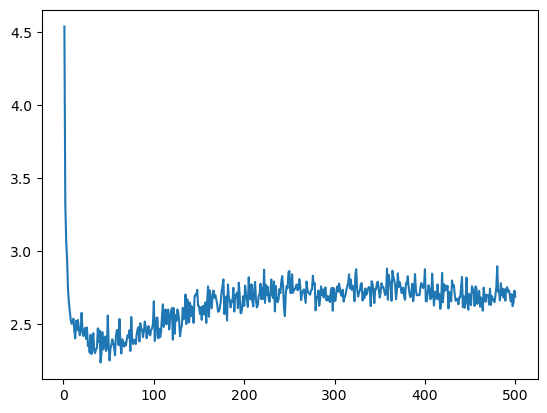

In [25]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.show()

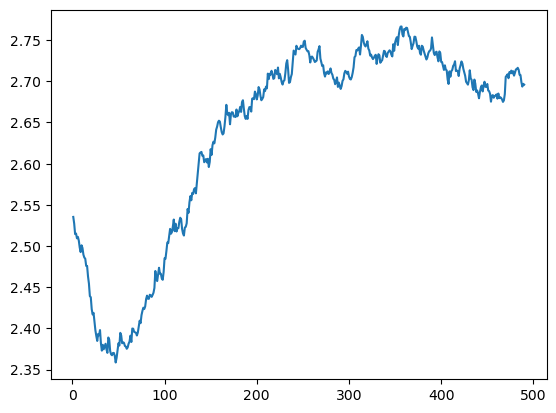

In [26]:
def smooth_curve(points,factor=0.9):
    smoothe_points=[]
    for i in points:
        if smoothe_points:
            previous=smoothe_points[-1]
            smoothe_points.append(previous*factor+i*(1-factor))
        else:
            smoothe_points.append(i)
    return smoothe_points
smotthe_mae_history=smooth_curve(average_mae_history[10:])
plt.plot(range(1,len(smotthe_mae_history)+1),smotthe_mae_history)
plt.show()

In [29]:
model=my_model()
model.fit(train_data,train_targets,epochs=80,batch_size=16,verbose=0)
test_mse_score,test_mae_score=model.evaluate(test_data,test_targets)
test_mae_score

4/4 [==============================] - 0s 1ms/step - loss: 18.3360 - mae: 2.9409


2.940943479537964